An essential dimension of motion is speed. However, this notion is prone to confusions as the speed that has to be measured can be relative to different object. Is it the speed of pixels? The speed of visual objects? We try to distinguish the latter two in this post.



In [ ]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt

In standard [Motion Clouds](http://motionclouds.invibe.net), speed is that of the pixels of the textons that produce the texture. It is thus defined as a (normal) distribution of probability around the speed plane that defines the mean speed: 

In [ ]:
import os
name = 'physical_speed'
DOWNSCALE = 1

import MotionClouds as mc
N_X, N_Y, N_frame = mc.N_X/DOWNSCALE, mc.N_Y/DOWNSCALE, mc.N_frame/DOWNSCALE

fx, fy, ft = mc.get_grids(N_X, N_Y, N_frame)

name_ = name + '_vanilla'
z = mc.envelope_gabor(fx, fy, ft)
mc.figures(z, name_)
mc.in_show_video(name_)

Another way to consider speed is that of visual objects. Consider looking through the window of a train a field of similarly sized (Gabor-shaped) bushes on an infinite plane. The objects which are closer appear bigger on the retina and their speed is perceived as higher than the smaller bushes near the horizon. This relation between size and speed is linear and is called motion parallax (credit: http://www.rhsmpsychology.com/Handouts/monocular_cues_IV.htm).

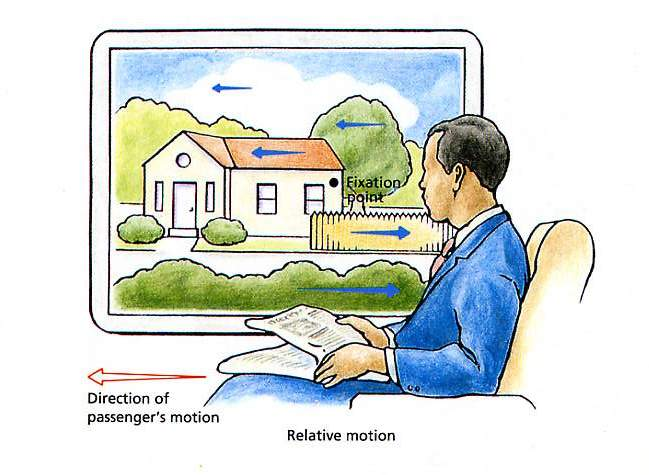

In [ ]:
from IPython.display import Image
Image('http://www.rhsmpsychology.com/images/monocular_IV.jpg')

Such a pattern of motion distribution is highly prototypical in natural settings and it is easy to generate a texture having such a profile but with textons that are uniformly spaced in space, similar to the "Golconde" painting from Magritte (By The Shimon Yanowitz Website, Fair use, https://en.wikipedia.org/w/index.php?curid=3773027):

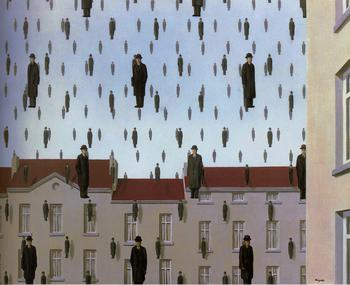

In [ ]:
Image('https://upload.wikimedia.org/wikipedia/en/7/71/Golconde.jpg')

More specifically, the relation reads :
$$
\frac{1}{f_0} \propto \frac{d\alpha}{d\theta} 
$$

where $f_0$ is the central scale (spatial frequency) of the visual object and $\frac{d\alpha}{d\theta}$ is the resulting retinal speed. See for instance this paper in  Front. Psychol. (06 October 2014 | https://doi.org/10.3389/fpsyg.2014.01103) "Modeling depth from motion parallax with the motion/pursuit ratio" by Mark Nawrot et al: 

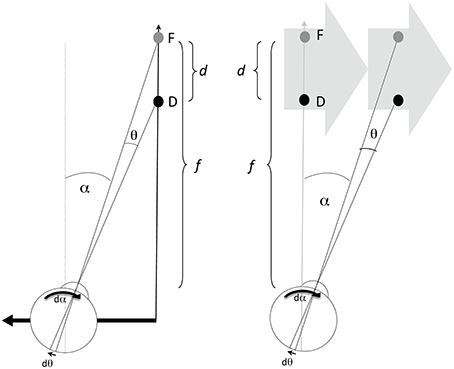

In [ ]:
Image('http://www.frontiersin.org/files/Articles/104347/fpsyg-05-01103-r2/image_m/fpsyg-05-01103-g001.jpg')

For this, we need to modify the way we define the speed plane, a bit similar to what we did with [gravitational waves](http://motionclouds.invibe.net/posts/a-bit-of-fun-with-gravity-waves.html). It is similar to convolving a vanilla Motion Clouds with a joint relation of $f_0$ and $V$ as defined above:

In [ ]:
mc.B_V

0.5

In [ ]:
def envelope_physical_speed(fx, fy, ft, K=1., V_X=mc.V_X, V_Y=mc.V_Y,
                        B_V=mc.B_V, sf_0=mc.sf_0, B_sf=mc.B_sf, loggabor=mc.loggabor,
                        theta=mc.theta, B_theta=mc.B_theta, alpha=mc.alpha):
    """
     physical speed envelope:
     selects a gaussian perpendicualr to the plane corresponding to the speed (V_X, V_Y) with some thickness B_V

    """


    envelope = mc.envelope_color(fx, fy, ft, alpha=alpha)
    envelope *= mc.envelope_orientation(fx, fy, ft, theta=theta, B_theta=B_theta)    
    envelope *= mc.envelope_radial(fx, fy, ft, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor)
    
    f_radius = mc.frequency_radius(fx, fy, ft, ft_0=mc.ft_0, clean_division=True)
    envelope *= np.exp(-.5*((ft + sf_0 * V_X - (f_radius - sf_0) / K )**2/(B_V*sf_0)**2))
    # Hack to remove the other part of the envelope - use angle instead to allow for higher B_theta values
    envelope *= fx > 0

    
    return envelope

name_ = name + '_parallax'
K = 1.
opts= dict(V_X=.5, sf_0=.2, B_V=.2)
z = envelope_physical_speed(fx, fy, ft, K=K, **opts)
mc.figures(z, name_)
mc.in_show_video(name_)

Let's explore what happens for different values of K:

In [ ]:
for K_ in 1./np.linspace(0.6, 1.4, 7)*K:
    name_ = name + '_parallax_K_' + str(K_).replace('.', '_')
    z = envelope_physical_speed(fx, fy, ft, K=K_, **opts)
    mc.figures(z, name_)
    mc.in_show_video(name_)